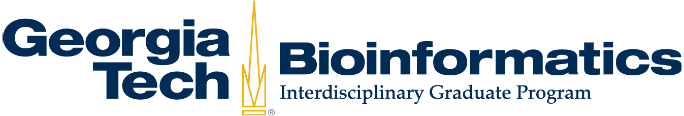

## RNA-seq quantification

### BIOS 4150/BIOL 6150
#### Instructor: Dr. King Jordan
#### TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)


---

# **1. Check salmon**


---

### Check salmon: https://combine-lab.github.io/salmon/

<div class="alert alert-block alert-warning">
    <h3>1.1 Salmon</h3>
    <p>We will use Salmon for fast transcript quantification</p>
</div>

In [1]:
#We will use Salmon for 
!salmon --help

salmon v1.10.2

Usage:  salmon -h|--help or 
        salmon -v|--version or 
        salmon -c|--cite or 
        salmon [--no-version-check] <COMMAND> [-h | options]

Commands:
     index      : create a salmon index
     quant      : quantify a sample
     alevin     : single cell analysis
     swim       : perform super-secret operation
     quantmerge : merge multiple quantifications into a single file


<div class="alert alert-block alert-warning">
    <h3>1.2 Salmon steps</h3>
    <h4>Salmon runs in 2 steps:</h4>
        <p>1. Preparing transcriptome index</p>
        <p>2. Quantification</p>
</div>

In [2]:
!salmon index --help

Version Server Response: Not Found

Index
Creates a salmon index.

Command Line Options:
  -v [ --version ]              print version string
  -h [ --help ]                 produce help message
  -t [ --transcripts ] arg      Transcript fasta file.
  -k [ --kmerLen ] arg (=31)    The size of k-mers that should be used for the 
                                quasi index.
  -i [ --index ] arg            salmon index.
  --gencode                     This flag will expect the input transcript 
                                fasta to be in GENCODE format, and will split 
                                the transcript name at the first '|' character.
                                These reduced names will be used in the output 
                                and when looking for these transcripts in a 
                                gene to transcript GTF.
  --features                    This flag will expect the input reference to be
                                in the tsv file for

In [3]:
!salmon quant --help

Version Server Response: Not Found
    salmon v1.10.2

    salmon quant has two modes --- one quantifies expression using raw reads
    and the other makes use of already-aligned reads (in BAM/SAM format).
    Which algorithm is used depends on the arguments passed to salmon quant.
    If you provide salmon with alignments '-a [ --alignments ]' then the
    alignment-based algorithm will be used, otherwise the algorithm for
    quantifying from raw reads will be used.

    to view the help for salmon's selective-alignment-based mode, use the command

    salmon quant --help-reads

    To view the help for salmon's alignment-based mode, use the command

    salmon quant --help-alignment

    


## 2. Check Data 

---

<div class="alert alert-block alert-warning">
    <h3>2.1 Reference transcriptome</h3>
    <p>Check RefSeq transcriptome file</p>
</div>

In [4]:
#Check the reference transcriptome file.
!head /storage/ice-shared/biol6150/Data/RefSeqTranscriptomeReferene.All.fa

>NM_000014.6 Homo sapiens alpha-2-macroglobulin (A2M), transcript variant 1, mRNA
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTCCAGCTCCTTCTTTCTGCAACATGGGGAAGA
ACAAACTCCTTCATCCAAGTCTGGTTCTTCTCCTCTTGGTCCTCCTGCCCACAGACGCCTCAGTCTCTGGAAAACCGCAG
TATATGGTTCTGGTCCCCTCCCTGCTCCACACTGAGACCACTGAGAAGGGCTGTGTCCTTCTGAGCTACCTGAATGAGAC
AGTGACTGTAAGTGCTTCCTTGGAGTCTGTCAGGGGAAACAGGAGCCTCTTCACTGACCTGGAGGCGGAGAATGACGTAC
TCCACTGTGTCGCCTTCGCTGTCCCAAAGTCTTCATCCAATGAGGAGGTAATGTTCCTCACTGTCCAAGTGAAAGGACCA
ACCCAAGAATTTAAGAAGCGGACCACAGTGATGGTTAAGAACGAGGACAGTCTGGTCTTTGTCCAGACAGACAAATCAAT
CTACAAACCAGGGCAGACAGTGAAATTTCGTGTTGTCTCCATGGATGAAAACTTTCACCCCCTGAATGAGTTGATTCCAC
TAGTATACATTCAGGATCCCAAAGGAAATCGCATCGCACAATGGCAGAGTTTCCAGTTAGAGGGTGGCCTCAAGCAATTT
TCTTTTCCCCTCTCATCAGAGCCCTTCCAGGGCTCCTACAAGGTGGTGGTACAGAAGAAATCAGGTGGAAGGACAGAGCA


In [5]:
#Check the reference transcriptome file.
!cat /storage/ice-shared/biol6150/Data/RefSeqTranscriptomeReferene.All.fa | grep ">" | wc -l

 185121 2340159 19220791


<div class="alert alert-block alert-warning">
    <h3>2.2 RNA is a big mess!</h3>
    <p>There could be multiple types of sequences in the reference.</p>
</div>

In [ ]:
#How many types of entries?
!cat RefSeqTranscriptomeReferene.All.fa | grep "NM" | wc -l
!cat RefSeqTranscriptomeReferene.All.fa | grep "NR" | wc -l

<div class="alert alert-block alert-warning">
    <h3>2.3 RNA-seq query file</h3>
    <p>We will work on one file here, but for any good study, you will need at least 100 samples. We will not work on those many samples for the project, but will work on at least 10.</p>
</div>

In [9]:
#Check the RNA-seq file.
!ls -lh /storage/ice-shared/biol6150/Data/SRR17237599/

total 7.2G
-rw-r--r-- 1 ssharma454 gtperson 3.6G Nov  8 10:21 SRR17237599_1.fastq
-rw-r--r-- 1 ssharma454 gtperson 3.6G Nov  8 10:21 SRR17237599_2.fastq


In [10]:
#Create the working directory.
!mkdir -p ~/scratch/RNA

## 3. Create index

---

<div class="alert alert-block alert-warning">
    <h3>3.1 Indexing can take ~1 hour to run</h3>
</div>

In [16]:
#Run the index command.
!salmon index -t /storage/ice-shared/biol6150/Data/RefSeqTranscriptomeReferene.All.fa -i ~/scratch/RNA/transcripts_index -k 31 -p 30


Version Server Response: Not Found
[2023-11-08 10:27:32.559] [jLog] [warning] The salmon index is being built without any decoy sequences.  It is recommended that decoy sequence (either computed auxiliary decoy sequence or the genome of the organism) be provided during indexing. Further details can be found at https://salmon.readthedocs.io/en/latest/salmon.html#preparing-transcriptome-indices-mapping-based-mode.
[2023-11-08 10:27:32.559] [jLog] [info] building index
out : /home/hice1/ssharma454/scratch/RNA/transcripts_index
[2023-11-08 10:27:32.559] [puff::index::jointLog] [info] Running fixFasta

[Step 1 of 4] : counting k-mers

[2023-11-08 10:27:48.158] [puff::index::jointLog] [warning] Removed 4060 transcripts that were sequence duplicates of indexed transcripts.
[2023-11-08 10:27:48.158] [puff::index::jointLog] [warning] If you wish to retain duplicate transcripts, please use the `--keepDuplicates` flag
[2023-11-08 10:27:48.161] [puff::index::jointLog] [info] Replaced 16 non-ATCG n

[2023-11-08 11:09:11.945] [puff::index::jointLog] [info] finished populating pos vector
[2023-11-08 11:09:11.945] [puff::index::jointLog] [info] writing index components
[2023-11-08 11:09:12.214] [puff::index::jointLog] [info] finished writing dense pufferfish index
[2023-11-08 11:09:12.303] [jLog] [info] done building index


<div class="alert alert-block alert-warning">
    <h3>3.2 Read about the -decoy option</h3>
    <p>The decoy sequences are regions of the target genome that are sequence similar to annotated transcripts. These are the regions of the genome most likely to cause mismapping (e.g. transcribed pseudogenes, etc.).</p>
    <h4>We did not use the -decoy option here, but it would be ideal for a proper study, and preferred for project. You will need the genome sequence to create the decoy sequence. </h4>
</div>

In [17]:
##Check the index files.
!ls -lh ~/scratch/RNA/transcripts_index/

total 890M
-rw-r--r-- 1 ssharma454 gtperson 708K Nov  8 10:27 complete_ref_lens.bin
-rw-r--r-- 1 ssharma454 gtperson  91M Nov  8 11:09 ctable.bin
-rw-r--r-- 1 ssharma454 gtperson 2.8M Nov  8 11:09 ctg_offsets.bin
-rw-r--r-- 1 ssharma454 gtperson 117K Nov  8 10:27 duplicate_clusters.tsv
-rw-r--r-- 1 ssharma454 gtperson 1.1K Nov  8 11:09 info.json
-rw-r--r-- 1 ssharma454 gtperson  89M Nov  8 11:09 mphf.bin
-rw-r--r-- 1 ssharma454 gtperson 476M Nov  8 11:09 pos.bin
-rw-r--r-- 1 ssharma454 gtperson  496 Nov  8 11:09 pre_indexing.log
-rw-r--r-- 1 ssharma454 gtperson  21M Nov  8 11:09 rank.bin
-rw-r--r-- 1 ssharma454 gtperson 1.4M Nov  8 11:09 refAccumLengths.bin
-rw-r--r-- 1 ssharma454 gtperson 6.5K Nov  8 11:09 ref_indexing.log
-rw-r--r-- 1 ssharma454 gtperson 708K Nov  8 11:09 reflengths.bin
-rw-r--r-- 1 ssharma454 gtperson 168M Nov  8 11:09 refseq.bin
-rw-r--r-- 1 ssharma454 gtperson  41M Nov  8 11:09 seq.bin
-rw-r--r-- 1 ssharma454 gtperson  127 Nov  8 11:09 versionInfo.json


## 4. Run quantification

---

In [19]:
#Run the quantification command
!salmon quant -i ~/scratch/RNA/transcripts_index/ -l A -1 /storage/ice-shared/biol6150/Data/SRR17237599/SRR17237599_1.fastq -2 /storage/ice-shared/biol6150/Data/SRR17237599/SRR17237599_2.fastq --validateMappings -o ~/scratch/RNA/transcripts_quant -p 30



Version Server Response: Not Found
### salmon (selective-alignment-based) v1.10.2
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { /home/hice1/ssharma454/scratch/RNA/transcripts_index/ }
### [ libType ] => { A }
### [ mates1 ] => { /storage/ice-shared/biol6150/Data/SRR17237599/SRR17237599_1.fastq }
### [ mates2 ] => { /storage/ice-shared/biol6150/Data/SRR17237599/SRR17237599_2.fastq }
### [ validateMappings ] => { }
### [ output ] => { /home/hice1/ssharma454/scratch/RNA/transcripts_quant }
### [ threads ] => { 30 }
Logs will be written to /home/hice1/ssharma454/scratch/RNA/transcripts_quant/logs
[2023-11-08 11:19:38.397] [jointLog] [info] setting maxHashResizeThreads to 30
[2023-11-08 11:19:38.397] [jointLog] [info] Fragment incompatibility prior below threshold.  Incompatible fragments will be ignored.
[2023-11-08 11:19:38.397] [jointLog] [info] Usage of --validateMappings implies use of minScoreFraction. Since not explicitly specified, it is being set to 0.65
[





[2023-11-08 11:21:12.467] [jointLog] [info] Computed 169,065 rich equivalence classes for further processing
[2023-11-08 11:21:12.467] [jointLog] [info] Counted 5,725,675 total reads in the equivalence classes 




[2023-11-08 11:21:12.480] [jointLog] [info] Number of mappings discarded because of alignment score : 42,231,311
[2023-11-08 11:21:12.480] [jointLog] [info] Number of fragments entirely discarded because of alignment score : 1,265,549
[2023-11-08 11:21:12.480] [jointLog] [info] Number of fragments discarded because they are best-mapped to decoys : 0
[2023-11-08 11:21:12.480] [jointLog] [info] Number of fragments discarded because they have only dovetail (discordant) mappings to valid targets : 162,065
[2023-11-08 11:21:12.480] [jointLog] [info] Mapping rate = 34.5468%

[2023-11-08 11:21:12.480] [jointLog] [info] finished quantifyLibrary()
[2023-11-08 11:21:12.482] [jointLog] [info] Starting optimizer
TBB Warning: The number of workers is currently limited to 7. The reque

In [21]:
##Check the output file.
!ls -lh ~/scratch/RNA/transcripts_quant/

total 7.5M
drwxr-xr-x 2 ssharma454 gtperson 4.0K Nov  8 11:21 aux_info
-rw-r--r-- 1 ssharma454 gtperson  435 Nov  8 11:21 cmd_info.json
-rw-r--r-- 1 ssharma454 gtperson  662 Nov  8 11:21 lib_format_counts.json
drwxr-xr-x 2 ssharma454 gtperson 4.0K Nov  8 11:21 libParams
drwxr-xr-x 2 ssharma454 gtperson 4.0K Nov  8 11:19 logs
-rw-r--r-- 1 ssharma454 gtperson 7.5M Nov  8 11:21 quant.sf


In [22]:
##Check the output file.
!head ~/scratch/RNA/transcripts_quant/quant.sf

Name	Length	EffectiveLength	TPM	NumReads
NM_000014.6	4610	4427.673	0.130295	16.000
NM_000015.3	1285	1102.673	0.065398	2.000
NM_000016.6	2261	2078.673	0.156113	9.000
NM_000017.4	1859	1676.673	0.946209	44.000
NM_000018.4	2184	2001.673	13.024490	723.054
NM_000019.4	1537	1354.673	0.000000	0.000
NM_000020.3	4177	3994.673	0.000000	0.000
NM_000021.4	6018	5835.673	0.467010	75.585
NM_000022.4	1496	1313.673	0.000000	0.000


In [25]:
##Check the number of output file.
!wc ~/scratch/RNA/transcripts_quant/quant.sf -l

181062 /home/hice1/ssharma454/scratch/RNA/transcripts_quant/quant.sf
